In [3]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import numpy as np
import pandas as pd

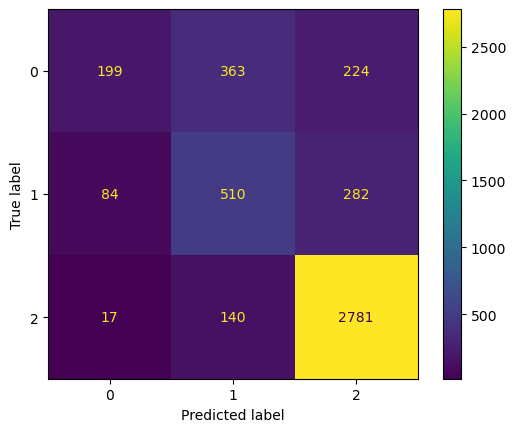

In [4]:
df = pd.read_csv('inference/model/results.txt')

data1 = confusion_matrix(df['y_true'].to_numpy(), df['y_pred'].to_numpy(), labels=[0, 1, 2])

disp = ConfusionMatrixDisplay(confusion_matrix=data1)
disp.plot()

In [5]:
polymers = df[df["ID"].str.contains("poly", na=False)].copy()

# split once
split_ID = polymers["ID"].str.split("_S", n=1, expand=True)

# assign back
polymers["ID"]     = split_ID[0]
polymers["sample"] = split_ID[1].astype(int)

polymers

,ID,y_pred,y_true,mask,sample
0,polyID6,2,2,1,41
1,polyID26,2,2,1,53
15,polyID5,2,2,1,24
20,polyID14,2,2,1,52
22,polyID6,2,2,1,74
...,...,...,...,...,...
4584,polyID12,2,2,1,65
4585,polyID6,2,2,1,87
4586,polyID2,2,2,1,42
4594,polyID12,2,2,1,40


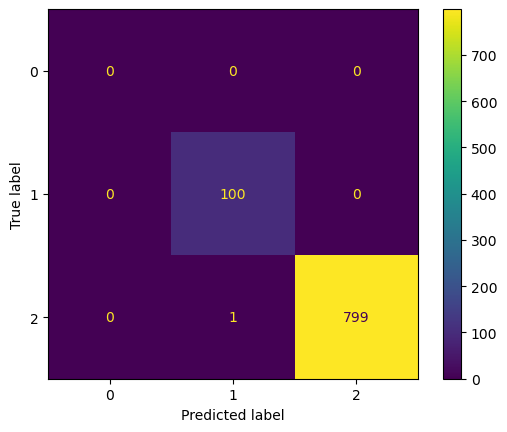

In [6]:
data2 = confusion_matrix(polymers['y_true'].to_numpy(), polymers['y_pred'].to_numpy(), labels=[0, 1, 2])

disp = ConfusionMatrixDisplay(confusion_matrix=data2)
disp.plot()

In [7]:
grouped = (
    polymers
    .groupby("ID", sort=False)        # group on ID, keep first-seen order
    .mean(numeric_only=True)          # take the mean of all numeric columns
    .reset_index()                    # turn ID back into a column
)

grouped = grouped.drop(columns="sample")

# convert them all to int
num_cols = grouped.select_dtypes(include="number").columns
grouped[num_cols] = grouped[num_cols].round().astype(int)

In [8]:
grouped

,ID,y_pred,y_true,mask
0,polyID6,2,2,1
1,polyID26,2,2,1
2,polyID5,2,2,1
3,polyID14,2,2,1
4,polyID13,2,2,1
5,polyID12,2,2,1
6,polyID35,2,2,1
7,polyID27,1,1,1
8,polyID2,2,2,1


In [9]:
grouped['y_true'].to_numpy()
grouped['y_pred'].to_numpy()

array([2, 2, 2, 2, 2, 2, 2, 1, 2])

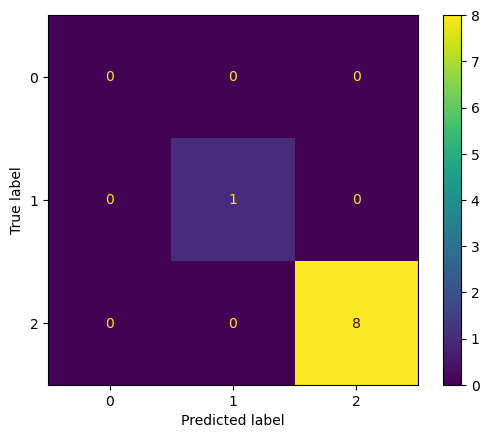

In [10]:
data3 = confusion_matrix(grouped['y_true'].to_numpy(), grouped['y_pred'].to_numpy(), labels=[0, 1, 2])

disp = ConfusionMatrixDisplay(confusion_matrix=data3)
disp.plot()